In [85]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
from torchvision import datasets, models, transforms
import skimage
import torchvision
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os


#GENERAL
%matplotlib inline
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import cv2
from tensorflow import keras
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
import tensorflow
import skimage
from skimage import *
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,BatchNormalization,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.preprocessing import image
#SCALER & TRANSFORMATION
from sklearn import *
from sklearn.model_selection import train_test_split
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)
plt.style.use('dark_background')

# Load Models

In [46]:
facenet = cv2.dnn.readNet('/content/drive/MyDrive/DIP/mask-detection-master/models/deploy.prototxt', '/content/drive/MyDrive/DIP/mask-detection-master/models/res10_300x300_ssd_iter_140000.caffemodel')
model = load_model('/content/drive/MyDrive/DIP/mask-detection-master/models/mask_detector.model')

# Load Image

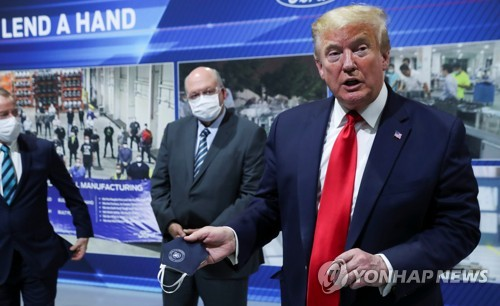

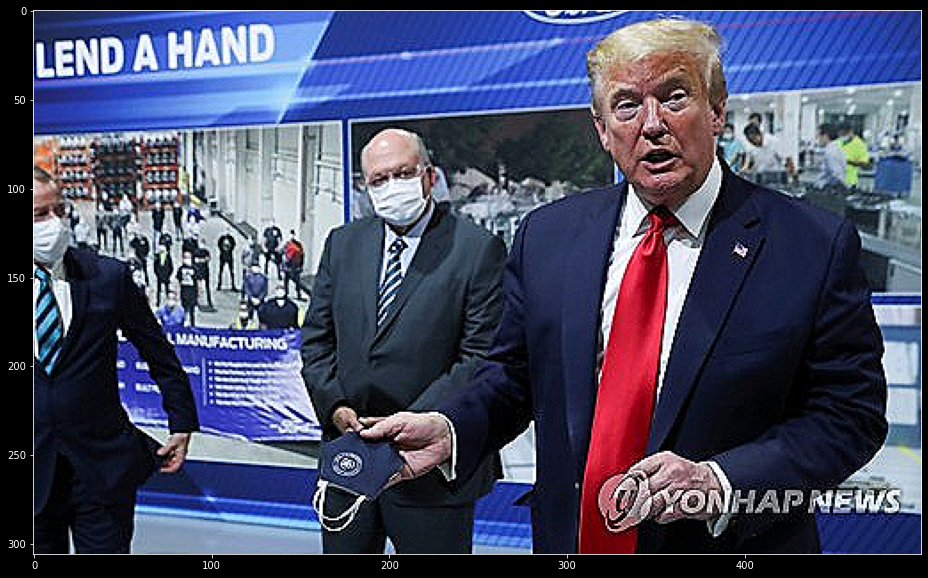

In [55]:
img = cv2.imread('/content/drive/MyDrive/DIP/mask-detection-master/imgs/02.jpg')

cv2_imshow(img)
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

h, w = img.shape[:2]

plt.figure(figsize=(16, 10))
plt.imshow(img[:, :, ::-1])

# Preprocess Image for Face Detection

In [60]:
blob = cv2.dnn.blobFromImage(img, scalefactor=1., size=(300, 300), mean=(104., 177., 123.))
facenet.setInput(blob)
dets = facenet.forward()

In [21]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.ToTensor(), 
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]), 
    'test' : transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

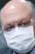

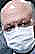

In [32]:
#Sharpening
import cv2
import numpy as np
img = cv2.imread('/content/drive/MyDrive/DIP/mask-detection-master/onePic.jpg')
cv2_imshow(img)
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
cv2_imshow(image_sharp)

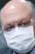

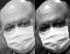

In [43]:
import cv2
import numpy as np
img = cv2.imread('/content/drive/MyDrive/DIP/mask-detection-master/onePic.jpg')
cv2_imshow(img)
img = cv2.imread('/content/drive/MyDrive/DIP/mask-detection-master/onePic.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))
cv2_imshow(res)


Original Dimensions :  (306, 500, 3)
Resized Dimensions :  (256, 256, 3)


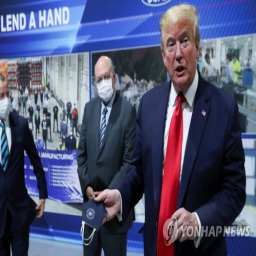

In [11]:
import cv2
 
img = cv2.imread('/content/drive/MyDrive/DIP/mask-detection-master/imgs/02.jpg', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (256,256)
  
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
cv2_imshow(resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

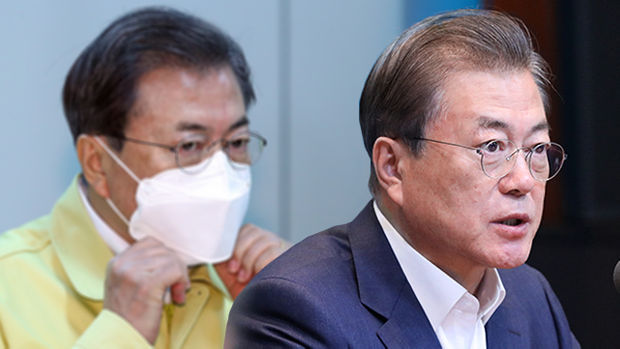

SystemError: ignored

In [ ]:
import cv2

import matplotlib.pyplot as plt 
IMAGE_SIZE = [256,256]
 
image = cv2.imread('/content/drive/MyDrive/DIP/mask-detection-master/imgs/01.jpg')

cv2_imshow(image)

image = cv2.resize(image, IMAGE_SIZE[0],IMAGE_SIZE[1]) 
cv2_imshow(image)

In [ ]:
from skimage import exposure
img = cv2.imread('/content/drive/MyDrive/DIP/mask-detection-master/imgs/02.jpg')

fimg = skimage.exposure.equalize_hist(img)
plt.imshow(cv2.cvtColor(fimg, cv2.COLOR_BGR2RGB))

# Detect Faces

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


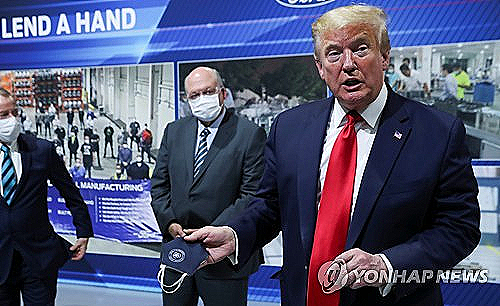

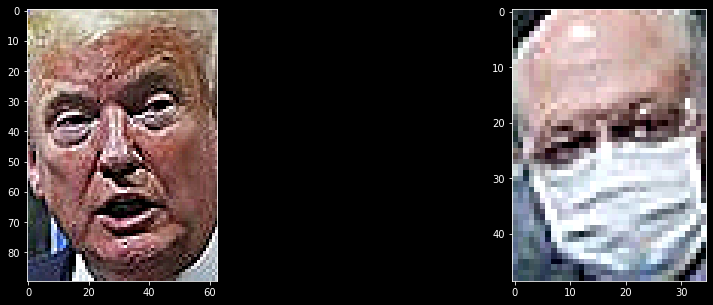

In [83]:
from skimage import exposure
facenet = cv2.dnn.readNet('/content/drive/MyDrive/DIP/mask-detection-master/models/deploy.prototxt', '/content/drive/MyDrive/DIP/mask-detection-master/models/res10_300x300_ssd_iter_140000.caffemodel')
model = load_model('/content/drive/MyDrive/DIP/mask-detection-master/models/mask_detector.model')

img = cv2.imread('/content/drive/MyDrive/DIP/mask-detection-master/imgs/02.jpg')

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)



fimg = skimage.exposure.equalize_hist(img)
cv2_imshow(img)

blob = cv2.dnn.blobFromImage(img, scalefactor=1., size=(300, 300), mean=(104., 177., 123.))
facenet.setInput(blob)
dets = facenet.forward()

faces= []
for i in range(dets.shape[2]):
    confidence = dets[0, 0, i, 2]
    if confidence < 0.5:
        continue
    x1 = int(dets[0, 0, i, 3] * w)
    y1 = int(dets[0, 0, i, 4] * h)
    x2 = int(dets[0, 0, i, 5] * w)
    y2 = int(dets[0, 0, i, 6] * h)
    face = img[y1:y2, x1:x2]
    faces.append(face)
plt.figure(figsize=(16, 5))
for i, face in enumerate(faces):
    plt.subplot(1, len(faces), i+1)
    plt.imshow(face[:, :, ::-1])
    plt.imsave("/content/drive/MyDrive/DIP/mask-detection-master/onePic.jpg", face[:, :, ::-1])

# Detect Masks from Faces

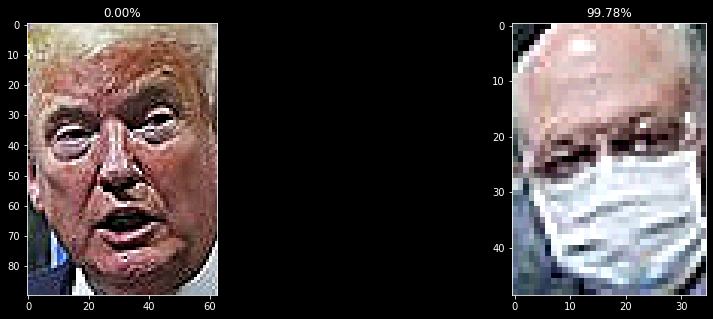

In [66]:
plt.figure(figsize=(16, 5))

for i, face in enumerate(faces):
    face_input = cv2.resize(face, dsize=(224, 224))
    face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2RGB)
    face_input = preprocess_input(face_input)
    face_input = np.expand_dims(face_input, axis=0)
    
    mask, nomask = model.predict(face_input).squeeze()

    plt.subplot(1, len(faces), i+1)
    plt.imshow(face[:, :, ::-1])
    plt.title('%.2f%%' % (mask * 100))

**CODE**

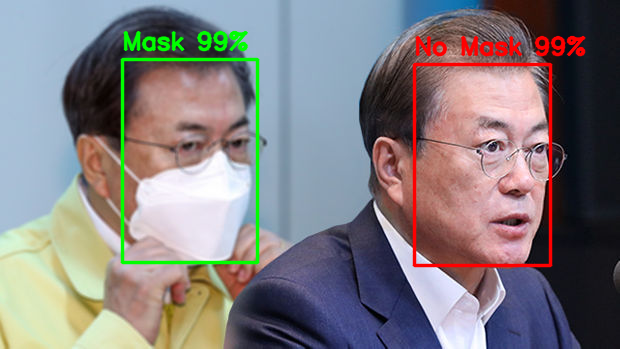

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

facenet = cv2.dnn.readNet('/content/drive/MyDrive/DIP/mask-detection-master/models/deploy.prototxt', '/content/drive/MyDrive/DIP/mask-detection-master/models/res10_300x300_ssd_iter_140000.caffemodel')
model = load_model('/content/drive/MyDrive/DIP/mask-detection-master/models/mask_detector.model')

img = cv2.imread('/content/drive/MyDrive/DIP/mask-detection-master/imgs/01.jpg')

h, w = img.shape[:2]

blob = cv2.dnn.blobFromImage(img, scalefactor=1., size=(300, 300), mean=(104., 177., 123.))
facenet.setInput(blob)
dets = facenet.forward()
result_img = img.copy()

for i in range(dets.shape[2]):
    confidence = dets[0, 0, i, 2]
    if confidence < 0.5:
        continue

    x1 = int(dets[0, 0, i, 3] * w)
    y1 = int(dets[0, 0, i, 4] * h)
    x2 = int(dets[0, 0, i, 5] * w)
    y2 = int(dets[0, 0, i, 6] * h)
     
    face = img[y1:y2, x1:x2]
    face_input = cv2.resize(face, dsize=(224, 224))
    face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2RGB)
    face_input = preprocess_input(face_input)
    face_input = np.expand_dims(face_input, axis=0)
        
    mask, nomask = model.predict(face_input).squeeze()
    if mask > nomask:
        color = (0, 255, 0)
        label = 'Mask %d%%' % (mask * 100)
    else:
        color = (0, 0, 255)
        label = 'No Mask %d%%' % (nomask * 100)
    cv2.rectangle(result_img, pt1=(x1, y1), pt2=(x2, y2), thickness=2, color=color, lineType=cv2.LINE_AA)
    cv2.putText(result_img, text=label, org=(x1, y1 - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.8, color=color, thickness=2, lineType=cv2.LINE_AA)

out.write(result_img)
cv2_imshow(result_img)

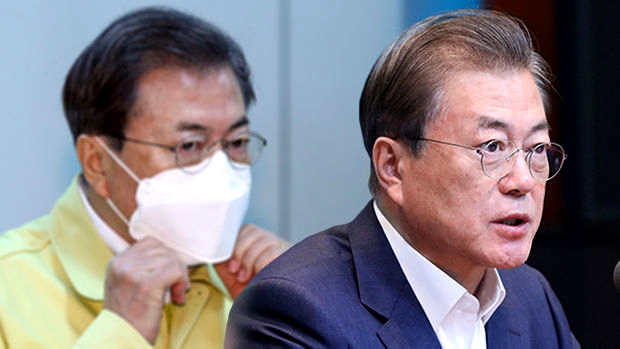

In [100]:
img = cv2.imread('/content/drive/MyDrive/DIP/mask-detection-master/imgs/01.jpg')
x, y = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(x, y))  
cv2_imshow(img_rescale)